In [1]:
# !pip install keras
# !pip install spacy
# !pip install pandas
# !pip install tensorflow
# !pip install seaborn
# !python -m spacy download en
# !pip install -U scikit-learn scipy matplotlib
# !pip install matplotlib
# !pip install ipywidgets
# !pip install jupyter





In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import seaborn as sns
import numpy as np
from ast import literal_eval

2023-05-14 01:16:02.615157: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-14 01:16:02.656767: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-14 01:16:02.657375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 01:16:03.399325: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# !nvidia-smi

## Импорт датасета

In [4]:
# чтение из файла в датафрейм
df = pd.read_csv('df_kw_subs.csv', sep=';')
df = df.astype({'subs_text': 'string'})
df = df.drop('imdb_id', axis=1)

df=df.iloc[0:200,:]
df


,keylist_fifteen,subs_text
0,"['android', 'spaceopera', 'rebellion', 'planet...","['hear', 'shut', 'main', 'reactor', 'destroy',..."
1,"['basedonnovel', 'love', 'friendship', 'flashb...","['hello', 'name', 'forrest', 'forrest', 'gump'..."
2,"['nudity', 'femalenudity', 'malenudity', 'comi...","['need', 'father', 'role', 'model', 'horny', '..."
3,"['murder', 'friendship', 'smalltown', 'robbery...","['sweat', 'know', 'im', 'excite', 'though', 's..."
4,"['love', 'alien', 'newyorkcity', 'future', 'sh...","['come', 'come', 'please', 'aziz', 'aziz', 'az..."
...,...,...
195,"['revenge', 'losangeles', 'hospital', 'flashba...","['medtech', 'bring', 'bastard', 'choke', 'deat..."
196,"['nudity', 'vampire', 'brotherbrotherrelations...","['suspect', 'describe', 'white', 'male', 'appr..."
197,"['paris', 'newyork', 'wedding', 'revolution', ...","['boys', 'boys', 'rabbi', 'jacob', 'leave', 'c..."
198,"['circus', 'doublelife', 'restaurant', 'fastfo...","['within', 'couple', 'days', 'million', 'copy'..."


In [5]:
# Обращение str-> list
df['keylist_fifteen_list'] = df['keylist_fifteen'].apply(literal_eval)
df['subs_text_list'] = df['subs_text'].apply(literal_eval)


In [6]:
df

,keylist_fifteen,subs_text,keylist_fifteen_list,subs_text_list
0,"['android', 'spaceopera', 'rebellion', 'planet...","['hear', 'shut', 'main', 'reactor', 'destroy',...","[android, spaceopera, rebellion, planet, rescu...","[hear, shut, main, reactor, destroy, sure, mad..."
1,"['basedonnovel', 'love', 'friendship', 'flashb...","['hello', 'name', 'forrest', 'forrest', 'gump'...","[basedonnovel, love, friendship, flashback, fa...","[hello, name, forrest, forrest, gump, want, ch..."
2,"['nudity', 'femalenudity', 'malenudity', 'comi...","['need', 'father', 'role', 'model', 'horny', '...","[nudity, femalenudity, malenudity, comingofage...","[need, father, role, model, horny, geek, boy, ..."
3,"['murder', 'friendship', 'smalltown', 'robbery...","['sweat', 'know', 'im', 'excite', 'though', 's...","[murder, friendship, smalltown, robbery, teach...","[sweat, know, im, excite, though, see, happen,..."
4,"['love', 'alien', 'newyorkcity', 'future', 'sh...","['come', 'come', 'please', 'aziz', 'aziz', 'az...","[love, alien, newyorkcity, future, shootout, p...","[come, come, please, aziz, aziz, aziz, light, ..."
...,...,...,...,...
195,"['revenge', 'losangeles', 'hospital', 'flashba...","['medtech', 'bring', 'bastard', 'choke', 'deat...","[revenge, losangeles, hospital, flashback, sho...","[medtech, bring, bastard, choke, death, watch,..."
196,"['nudity', 'vampire', 'brotherbrotherrelations...","['suspect', 'describe', 'white', 'male', 'appr...","[nudity, vampire, brotherbrotherrelationship, ...","[suspect, describe, white, male, approximately..."
197,"['paris', 'newyork', 'wedding', 'revolution', ...","['boys', 'boys', 'rabbi', 'jacob', 'leave', 'c...","[paris, newyork, wedding, revolution, prisoner...","[boys, boys, rabbi, jacob, leave, cmon, let, g..."
198,"['circus', 'doublelife', 'restaurant', 'fastfo...","['within', 'couple', 'days', 'million', 'copy'...","[circus, doublelife, restaurant, fastfoodresta...","[within, couple, days, million, copy, book, ro..."


## Статистики по датасету 

In [7]:
all_sub_words=set()
for sub in df.subs_text_list:
   for word in sub:
       if word not in all_sub_words:
           all_sub_words.add(word)

all_kw_words=set()
for keylist in df.keylist_fifteen_list:
   for word in keylist:
       if word not in all_kw_words:
           all_kw_words.add(word)

input_words = sorted(list(all_sub_words))
target_words = sorted(list(all_kw_words))
num_encoder_tokens = len(all_sub_words)
num_decoder_tokens = len(all_kw_words)

input_token_index = dict(
   [(word, i) for i, word in enumerate(input_words)])
target_token_index = dict(
   [(word, i) for i, word in enumerate(target_words)])

In [8]:
print(f'Длина словаря субтитров: {len(all_sub_words)}, \n\
Максимум слов в субтитрах: {df.subs_text_list.apply(lambda x: len(x)).max()} \n\
Минимум слов в субтитрах: {df.subs_text_list.apply(lambda x: len(x)).min()} \n\n\
Длина словаря ключевых слов:{len(all_kw_words)}, \n\
Максимум ключевых слов: {df.keylist_fifteen_list.apply(lambda x: len(x)).max()}, \n\
Минимум ключевых слов {df.keylist_fifteen_list.apply(lambda x: len(x)).min()}')

Длина словаря субтитров: 35464, 
Максимум слов в субтитрах: 8845 
Минимум слов в субтитрах: 227 

Длина словаря ключевых слов:1478, 
Максимум ключевых слов: 15, 
Минимум ключевых слов 15


In [9]:
df

,keylist_fifteen,subs_text,keylist_fifteen_list,subs_text_list
0,"['android', 'spaceopera', 'rebellion', 'planet...","['hear', 'shut', 'main', 'reactor', 'destroy',...","[android, spaceopera, rebellion, planet, rescu...","[hear, shut, main, reactor, destroy, sure, mad..."
1,"['basedonnovel', 'love', 'friendship', 'flashb...","['hello', 'name', 'forrest', 'forrest', 'gump'...","[basedonnovel, love, friendship, flashback, fa...","[hello, name, forrest, forrest, gump, want, ch..."
2,"['nudity', 'femalenudity', 'malenudity', 'comi...","['need', 'father', 'role', 'model', 'horny', '...","[nudity, femalenudity, malenudity, comingofage...","[need, father, role, model, horny, geek, boy, ..."
3,"['murder', 'friendship', 'smalltown', 'robbery...","['sweat', 'know', 'im', 'excite', 'though', 's...","[murder, friendship, smalltown, robbery, teach...","[sweat, know, im, excite, though, see, happen,..."
4,"['love', 'alien', 'newyorkcity', 'future', 'sh...","['come', 'come', 'please', 'aziz', 'aziz', 'az...","[love, alien, newyorkcity, future, shootout, p...","[come, come, please, aziz, aziz, aziz, light, ..."
...,...,...,...,...
195,"['revenge', 'losangeles', 'hospital', 'flashba...","['medtech', 'bring', 'bastard', 'choke', 'deat...","[revenge, losangeles, hospital, flashback, sho...","[medtech, bring, bastard, choke, death, watch,..."
196,"['nudity', 'vampire', 'brotherbrotherrelations...","['suspect', 'describe', 'white', 'male', 'appr...","[nudity, vampire, brotherbrotherrelationship, ...","[suspect, describe, white, male, approximately..."
197,"['paris', 'newyork', 'wedding', 'revolution', ...","['boys', 'boys', 'rabbi', 'jacob', 'leave', 'c...","[paris, newyork, wedding, revolution, prisoner...","[boys, boys, rabbi, jacob, leave, cmon, let, g..."
198,"['circus', 'doublelife', 'restaurant', 'fastfo...","['within', 'couple', 'days', 'million', 'copy'...","[circus, doublelife, restaurant, fastfoodresta...","[within, couple, days, million, copy, book, ro..."


In [10]:
# import spacy
# from time import time

# nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 

# # Process text as batches and yield Doc objects in order
# text = [str(doc) for doc in nlp.pipe(df.keylist_fifteen, batch_size=5000)]

# summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(df.subs_text, batch_size=5000)]

## Подбор максимальной длины субтитров

0.3


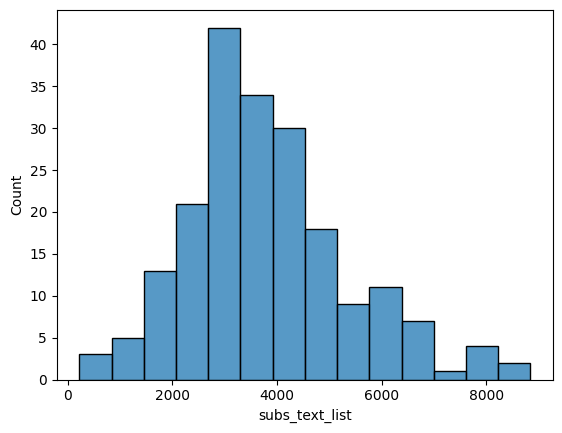

In [11]:
# доля фильмов с длиной субтитров менее ... 

max_text_len = 3000
max_summary_len = 15

sns.histplot(df.subs_text_list.apply(lambda x: len(x)))
cnt = 0
for i in df.subs_text_list:
    if len(i) <= max_text_len:
        cnt = cnt + 1
print(cnt / len(df.subs_text_list))

## Подготовка данных

In [12]:
# добавление start/end of the sequence (для инференса)

def add_start_stop(keylist):
    

    keylist.insert(0, '_START_')
    keylist.insert(0, 'sostok')
    keylist.append('_END_')
    keylist.append('eostok')
    return keylist

df['keylist_fifteen_list'] = df['keylist_fifteen_list'].apply(add_start_stop)

In [13]:
df

,keylist_fifteen,subs_text,keylist_fifteen_list,subs_text_list
0,"['android', 'spaceopera', 'rebellion', 'planet...","['hear', 'shut', 'main', 'reactor', 'destroy',...","[sostok, _START_, android, spaceopera, rebelli...","[hear, shut, main, reactor, destroy, sure, mad..."
1,"['basedonnovel', 'love', 'friendship', 'flashb...","['hello', 'name', 'forrest', 'forrest', 'gump'...","[sostok, _START_, basedonnovel, love, friendsh...","[hello, name, forrest, forrest, gump, want, ch..."
2,"['nudity', 'femalenudity', 'malenudity', 'comi...","['need', 'father', 'role', 'model', 'horny', '...","[sostok, _START_, nudity, femalenudity, malenu...","[need, father, role, model, horny, geek, boy, ..."
3,"['murder', 'friendship', 'smalltown', 'robbery...","['sweat', 'know', 'im', 'excite', 'though', 's...","[sostok, _START_, murder, friendship, smalltow...","[sweat, know, im, excite, though, see, happen,..."
4,"['love', 'alien', 'newyorkcity', 'future', 'sh...","['come', 'come', 'please', 'aziz', 'aziz', 'az...","[sostok, _START_, love, alien, newyorkcity, fu...","[come, come, please, aziz, aziz, aziz, light, ..."
...,...,...,...,...
195,"['revenge', 'losangeles', 'hospital', 'flashba...","['medtech', 'bring', 'bastard', 'choke', 'deat...","[sostok, _START_, revenge, losangeles, hospita...","[medtech, bring, bastard, choke, death, watch,..."
196,"['nudity', 'vampire', 'brotherbrotherrelations...","['suspect', 'describe', 'white', 'male', 'appr...","[sostok, _START_, nudity, vampire, brotherbrot...","[suspect, describe, white, male, approximately..."
197,"['paris', 'newyork', 'wedding', 'revolution', ...","['boys', 'boys', 'rabbi', 'jacob', 'leave', 'c...","[sostok, _START_, paris, newyork, wedding, rev...","[boys, boys, rabbi, jacob, leave, cmon, let, g..."
198,"['circus', 'doublelife', 'restaurant', 'fastfo...","['within', 'couple', 'days', 'million', 'copy'...","[sostok, _START_, circus, doublelife, restaura...","[within, couple, days, million, copy, book, ro..."


In [14]:
# выбор фильмов по длине субтитров

df=df[df['subs_text_list'].apply(lambda x: len(x)) <= max_text_len]
# sns.histplot(df.subs_text_list.apply(lambda x: len(eval(x))))
df = df.reset_index(drop=True)
df

,keylist_fifteen,subs_text,keylist_fifteen_list,subs_text_list
0,"['silentfilm', 'dystopia', 'future', 'robot', ...","['soon', 'premiere', 'film', 'metropolis', 'se...","[sostok, _START_, silentfilm, dystopia, future...","[soon, premiere, film, metropolis, severely, t..."
1,"['japan', 'coma', 'martialarts', 'kungfu', 'un...","['find', 'sadistic', 'know', 'bet', 'could', '...","[sostok, _START_, japan, coma, martialarts, ku...","[find, sadistic, know, bet, could, fry, egg, h..."
2,"['sex', 'femalenudity', 'londonengland', 'conc...","['remember', 'lisa', 'think', 'cloud', 'work',...","[sostok, _START_, sex, femalenudity, londoneng...","[remember, lisa, think, cloud, work, say, thin..."
3,"['violence', 'marriage', 'smalltown', 'robbery...","['keep', 'head', 'east', 'yeah', 'idea', 'stay...","[sostok, _START_, violence, marriage, smalltow...","[keep, head, east, yeah, idea, stay, big, citi..."
4,"['nazis', 'treasure', 'treasurehunt', 'savingt...","['hovitos', 'near', 'poison', 'still', 'fresh'...","[sostok, _START_, nazis, treasure, treasurehun...","[hovitos, near, poison, still, fresh, three, d..."
5,"['berlin', 'malenudity', 'femalenudity', 'hipp...","['long', 'time', 'guests', 'round', 'last', 'n...","[sostok, _START_, berlin, malenudity, femalenu...","[long, time, guests, round, last, night, clear..."
6,"['fathersonrelationship', 'escape', 'nazis', '...","['dismount', 'hermangs', 'horsesick', 'chap', ...","[sostok, _START_, fathersonrelationship, escap...","[dismount, hermangs, horsesick, chap, one, wan..."
7,"['womandirector', 'hospital', 'extramaritalaff...","['advertise', 'product', 'brand', 'contact', '...","[sostok, _START_, womandirector, hospital, ext...","[advertise, product, brand, contact, wwwopensu..."
8,"['dyinganddeath', 'isolation', 'child', 'becom...","['spring', 'summer', 'fall', 'winter', 'spring...","[sostok, _START_, dyinganddeath, isolation, ch...","[spring, summer, fall, winter, spring, spring,..."
9,"['elves', 'orcs', 'middleearthtolkien', 'hobbi...","['pass', 'gandalf', 'servant', 'secret', 'fire...","[sostok, _START_, elves, orcs, middleearthtolk...","[pass, gandalf, servant, secret, fire, wielder..."


In [15]:
# деление на выборки

from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(df["subs_text_list"]),
    np.array(df["keylist_fifteen_list"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [16]:
len(x_tr), len(x_val), len(y_val)

(54, 6, 6)

## Токенизация и ограничение слов по кол-ву вхождений

In [17]:
# Токенизация для подсчёта словаря
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(x_tr)

In [18]:
# фильтрация слов по кол-ву вхождений в датасет

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% редких слов в субтитрах: ", (cnt / tot_cnt) * 100)

% редких слов в субтитрах:  75.40763153471171


In [19]:
# Токенизация субтитров, без редких слов
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# Токенизация в числовую последовательность
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad нулями до max_text_len
x_tr = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

# Размер словаря (+1 на padding)
x_voc = x_tokenizer.num_words + 1

print("Размер словаря субтитров = {}".format(x_voc))
(x_voc)**(1/2)*1.6

Размер словаря субтитров = 2927


86.56280956623347

In [20]:
# Токенизация ключевых слов
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(y_tr)

thresh = 2

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Токенизация ключевых слов без учёта редких
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Токенизация в числовую последовательность
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad нулями до max_text_len
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 74.28057553956835
Size of vocabulary in Y = 144


<Axes: ylabel='Count'>

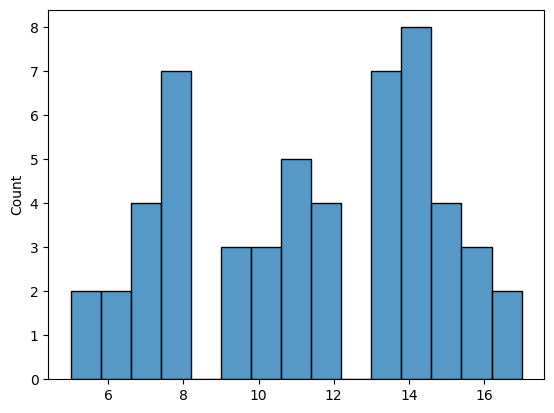

In [21]:
# кол-во ключевых слов при обучении (для каждого фильма)

y_tr_seq_len = []
for kwlist in y_tr_seq:
    y_tr_seq_len.append(len(kwlist))

sns.histplot(data=y_tr_seq_len, bins=15)

<Axes: ylabel='Count'>

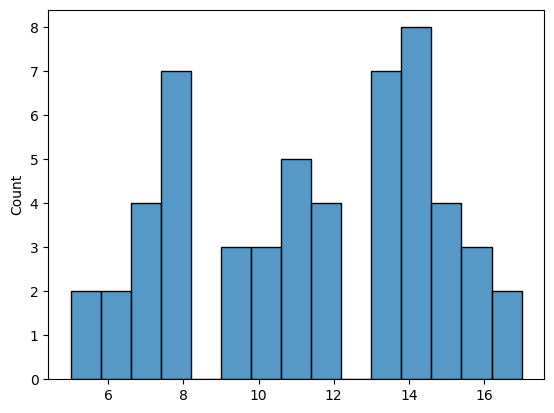

In [22]:
# встречаемость ключевых слов

y_tr_seq_len = []
for kwlist in y_tr_seq:
    y_tr_seq_len.append(len(kwlist))

sns.histplot(data=y_tr_seq_len, bins=15)

<Axes: ylabel='Count'>

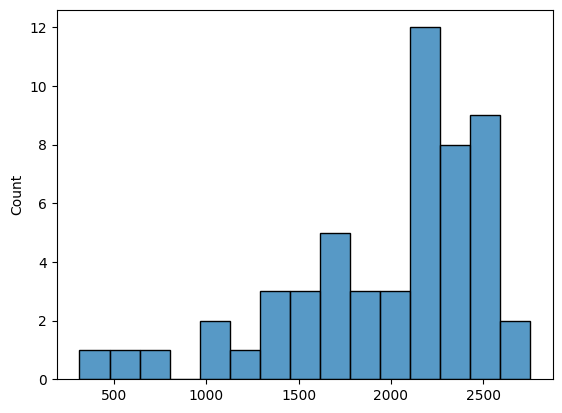

In [23]:
# кол-во слов в субтитрах при обучении (для каждого фильма)

y_tr_seq_len = []
for kwlist in x_tr_seq:
    y_tr_seq_len.append(len(kwlist))

sns.histplot(data=y_tr_seq_len, bins=15)

## Архитектура модели

In [24]:

latent_dim = 300
# размер embedding
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(input_dim=x_voc, output_dim=embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(input_dim=y_voc, output_dim=embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


2023-05-14 01:16:08.762778: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 3000, 200)    585400      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 3000, 300),  601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [25]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Компиляция и фит

In [26]:
# выбираем перекрёстную энтропию и rmsprop 

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [27]:
# fit 

# from keras.callbacks import CSVLogger

# csv_logger = CSVLogger('training.log', separator=',', append=False)

# history = model.fit(
#     [x_tr, y_tr[:, :-1]],
#     y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
#     epochs=50,
#     callbacks=[es, csv_logger],
#     batch_size=128,
#     validation_data=([x_val, y_val[:, :-1]],
#                      y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
#                      , 1:]),
#     )

In [28]:
# сохранение модели для инференса оффлайн

# model.save('colab_200_films_model')
# !zip -r colab_200_films_model.zip colab_200_films_model

## Модель для инференса

In [38]:
# загрузка модели

import tensorflow as tf
model = tf.keras.models.load_model('colab_200_films_model')

In [39]:
# маппинг слов

reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index



In [40]:
# from matplotlib import pyplot
# log_data = pd.read_csv('training.log', sep=',', engine='python')
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

In [41]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [42]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [43]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [44]:
# Generate the predictions 

# kw_orig = []
# kw_pred = []
# subs = []

# for i in range(0, 3):

# #      print('Review:', seq2text(x_tr[i]))
#        subs.append(seq2text(x_tr[i]))
#        print('Original summary:', seq2summary(y_tr[i]))
#        kw_orig.append(seq2summary(y_tr[i]))
#        # prediction = decode_sequence(x_tr[i].reshape(1,
#        #        max_text_len))
#        # print('Predicted summary:', prediction)
#        kw_pred.append(decode_sequence(x_tr[i].reshape(1,
#               max_text_len)))
#        print('\n')


In [46]:
for i in range(0, 19):
    print ('Review:', seq2text(x_tr[i]))
    print ('Original summary:', seq2summary(y_tr[i]))
    print ('Predicted summary:', decode_sequence(x_tr[i].reshape(1,
           max_text_len)))
    print ('\n')

Review: knapsu old women ’ work silly byebye niila moment memory open like pipe shaft straight childhood sweden boom even pull rush success thank boom people make way get villa progress come fast people still felt poor rich come fear would take away area call like female since many kid bear come asphalt smooth nice like make fine road whats daddy speak swedish asphalt asphalt asphalt asphalt see future gon na dress black skin go inside say go inside asphalt sign promise future know keep bike road know end get china cause dad say name matti whats whats name understand want friend something lack energy run like cage animal look way something warm inner fire prick butt prick butt say come say like work lot demand little place gods place worst form without god also england course think least know im go come visit see big world best keep far pajala world try kill stop move im dance table well nothing wrong rifle long think hunt party let stay shoot days im one party hit moose meter distance

KeyboardInterrupt: 

In [ ]:
df_pred = pd.DataFrame({'kw_orig':kw_orig, 'kw_pred':kw_pred, 'subs':subs})


In [ ]:
df_pred